<a href="https://colab.research.google.com/github/chaerui7967/stock_predict_news_and_youtube/blob/master/%EC%8B%9C%EA%B3%84%EC%97%B4_Arima_prophet_%EB%B9%84%EA%B5%90_%EC%85%80%ED%8A%B8%EB%A6%AC%EC%98%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

## 라이브러리 설치

In [1]:
!pip install finance-datareader
!pip install pykrx

     |████████████████████████████████| 81 kB 4.1 MB/s 
     |████████████████████████████████| 60 kB 7.2 MB/s 
     |████████████████████████████████| 251 kB 38.9 MB/s 


## colab 이용 시 한글 폰트 설정

In [1]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

# 버전과 위치정보
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.7/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [34]:
# 설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔고딕 없음

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/s

In [13]:
# 나눔고딕 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [35]:
# 설치확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [15]:
# 나눔 폰트 설치경로
nanum_font

['/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truety

In [36]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴
import matplotlib.pyplot as plt
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

Python 3.7.11
설정 폰트 글꼴: ['Malgun Gothic'], 설정 폰트 사이즈: 10.0


In [32]:
fm._rebuild()

In [37]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system...')

In [7]:
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )
# 커널 다시시작

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['NanumGothic']


## 데이터 로드

In [39]:
def money_sur(stock_name, start, end):

  # 라이브러리를 찾음... 한방에 나옴...
    start_date = start
    end_date = end
    sample_code = stock_name

    dataset = fdr.DataReader(sample_code, start = start_date, end = end_date )
    dataset = dataset.reset_index()
    df = stock.get_market_fundamental_by_date(fromdate=start_date, todate=end_date, ticker=sample_code)
    df = df.reset_index()
    df.columns = ['Date','BPS', 'PER', 'PBR', 'EPS', 'DIV', 'DPS']
    data = pd.merge(dataset, df, on='Date')

    return data

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
cel_df = money_sur('068270', start = '20180101', end = end_date)

cel_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,206047,209825,204757,208167,1176443,0.021709,16457,150.10,13.730000,1505,0.0,0
1,2018-01-03,210931,227794,209272,227334,2411162,0.092075,16457,163.92,14.990000,1505,0.0,0
2,2018-01-04,230007,240696,226044,230376,3265527,0.013381,16457,166.11,15.190000,1505,0.0,0
3,2018-01-05,234890,246041,234061,245949,1920918,0.067598,16457,177.34,16.219999,1505,0.0,0
4,2018-01-08,256637,279399,255440,278754,4298770,0.133381,16457,201.00,18.379999,1505,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,269500,271000,265500,267500,394088,-0.005576,24262,71.22,11.030000,3756,0.0,0
912,2021-09-13,266500,267000,260500,262000,505510,-0.020561,24262,69.76,10.800000,3756,0.0,0
913,2021-09-14,261500,265000,260500,263000,416684,0.003817,24262,70.02,10.840000,3756,0.0,0
914,2021-09-15,266000,275500,265500,272500,576273,0.036122,24262,72.55,11.230000,3756,0.0,0


## ARIMA 차분 설정

In [41]:
df1 = cel_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,208167
1,2018-01-03,227334
2,2018-01-04,230376
3,2018-01-05,245949
4,2018-01-08,278754
...,...,...
911,2021-09-10,267500
912,2021-09-13,262000
913,2021-09-14,263000
914,2021-09-15,272500


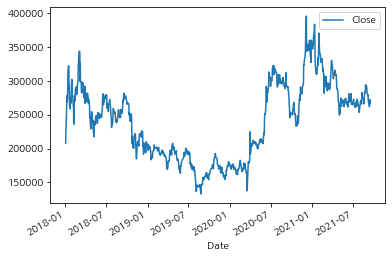

In [42]:
df1.plot('Date','Close')

In [43]:
df1.columns = ['Date', 'Price']

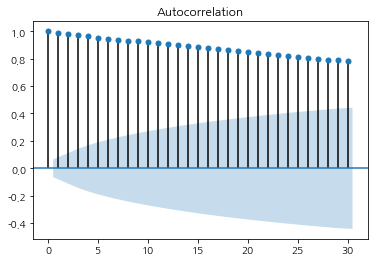

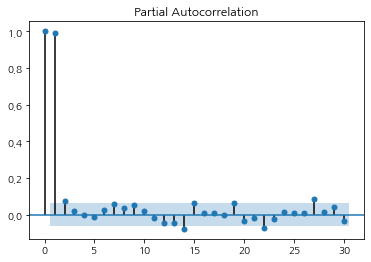

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df1.Price)
plot_pacf(df1.Price)
plt.show()

ACF를 보면 완만하지만 꾸준히 줄어드는 것으로 보인다. 또한 PACF는 1의 Time lag에서 약 0.99를 보이고 이후에 급격히 감소한다.

In [45]:
# 시계열 정상성 검정 Augmented Dickey-Fuller Test
# 비정상성 확인

from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['Price'])

print(f'ADF statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF statistic: -1.9986268234028342
p-value: 0.287175513648522


1차 차분 및 로그변환

In [46]:
x = df1['Price'].values
x = np.log(x)

diff = x[1:] - x[:-1] # 차분

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


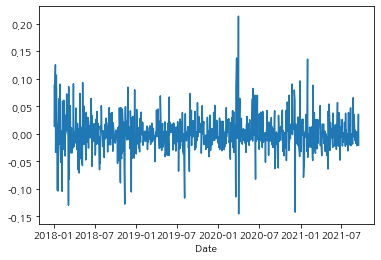

In [47]:
sns.lineplot(df1.iloc[1:, 0], diff)

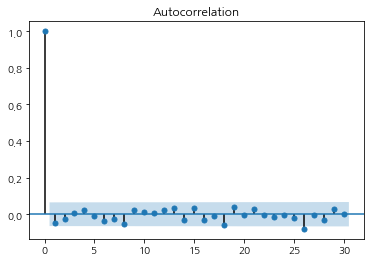

In [48]:
fig = plot_acf(diff)

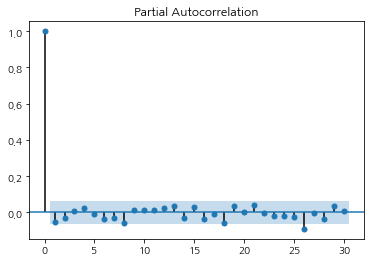

In [49]:
fig = plot_pacf(diff)

In [50]:
result_r = adfuller(diff)

print(f'ADF statistic: {result_r[0]}')
print(f'p-value: {result_r[1]}')  # 1차 차분으로는 안됨 2차 차분

ADF statistic: -31.890691096758314
p-value: 0.0


## Arima model

### Arima AR, MA 차수 조정

In [51]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
# 1,1,1 // 1,2,1 // 1,2,2 // 2,2,2 // .... 여러가지 차수를 지정해봤을 때 2,1,2가 최적임
# (AR = 2, 차분 =1, MA=2) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9515.541
Method:                       css-mle   S.D. of innovations           7946.838
Date:                Thu, 16 Sep 2021   AIC                          19043.081
Time:                        06:40:38   BIC                          19071.995
Sample:                             1   HQIC                         19054.117
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.8713    162.230      0.270      0.787    -274.094     361.837
ar.L1.D.y      0.9695      0.440      2.201      0.028       0.106       1.833
ar.L2.D.y     -0.0014      0.418     -0.003      0.9

In [52]:
# const 가 유의하지 않으므로 trend를 nc로해서 다시 모델 적합
model = ARIMA(df1.Price.values, order = (2,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)  # ar, ma가 유의하지 않음
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9515.576
Method:                       css-mle   S.D. of innovations           7947.155
Date:                Thu, 16 Sep 2021   AIC                          19041.153
Time:                        06:40:39   BIC                          19065.247
Sample:                             1   HQIC                         19050.350
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      0.9676      0.441      2.197      0.028       0.104       1.831
ar.L2.D.y     -0.0002      0.419     -0.001      1.000      -0.821       0.820
ma.L1.D.y     -1.0385      0.439     -2.365      0.0

In [53]:
model = ARIMA(df1.Price.values, order = (3,1,2)) # ar : 3, ma : 2로 arima 시행 여전히 c는 유의하지않음
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)  
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  915
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -9507.347
Method:                       css-mle   S.D. of innovations           7872.453
Date:                Thu, 16 Sep 2021   AIC                          19026.694
Time:                        06:40:40   BIC                          19055.607
Sample:                             1   HQIC                         19037.730
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      1.4798      0.036     40.729      0.000       1.409       1.551
ar.L2.D.y     -0.8172      0.058    -14.070      0.000      -0.931      -0.703
ar.L3.D.y     -0.0983      0.034     -2.897      0.0

### 모델 진행

In [54]:
# 학습, 테스트 데이터 분리
train = df1[:-10]
test = df1[-10:]

In [55]:
model = ARIMA(train.Price.values, order = (3,1,2))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  905
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -9406.360
Method:                       css-mle   S.D. of innovations           7897.701
Date:                Thu, 16 Sep 2021   AIC                          18824.719
Time:                        06:40:41   BIC                          18853.567
Sample:                             1   HQIC                         18835.736
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.D.y      1.4788      0.037     40.339      0.000       1.407       1.551
ar.L2.D.y     -0.8162      0.058    -14.023      0.000      -0.930      -0.702
ar.L3.D.y     -0.0992      0.034     -2.915      0.0

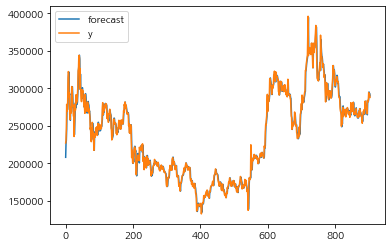

In [56]:
fig1 = model_fit.plot_predict()

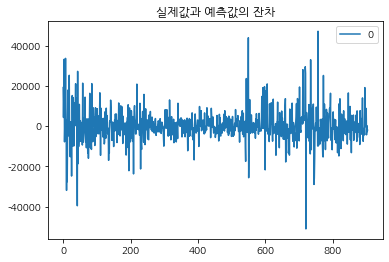

In [57]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [58]:
fore = model_fit.forecast(steps=10) # 10일 예측
print(fore)

(array([286611.33109137, 284871.69960902, 283680.47852203, 283476.4763318 ,
       284319.56061049, 285850.92974404, 287447.61664223, 288475.29688255,
       288539.97447744, 287638.51285756]), array([ 7897.70111311, 10722.0914781 , 13127.58024172, 15267.48631175,
       17200.57686933, 18927.38075897, 20447.80105074, 21781.92837424,
       22971.91041516, 24072.16805458]), array([[271132.12134901, 302090.54083373],
       [263856.78647299, 305886.61274505],
       [257950.8940441 , 309410.06299997],
       [253552.75302631, 313400.19963729],
       [250607.04943328, 318032.0717877 ],
       [248753.94513479, 322947.91435329],
       [247370.66301974, 327524.57026472],
       [245783.50175521, 331167.0920099 ],
       [243515.85740764, 333564.09154724],
       [240457.93044079, 334819.09527433]]))


## Arima 결과

In [59]:
# 마지막 10일의 예측 데이터
pred_arima_y = fore[0].tolist()

# 실제 10일의 데이터 
test_y = test.Price.values

# 신뢰구간
# 마지막 10일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in fore[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

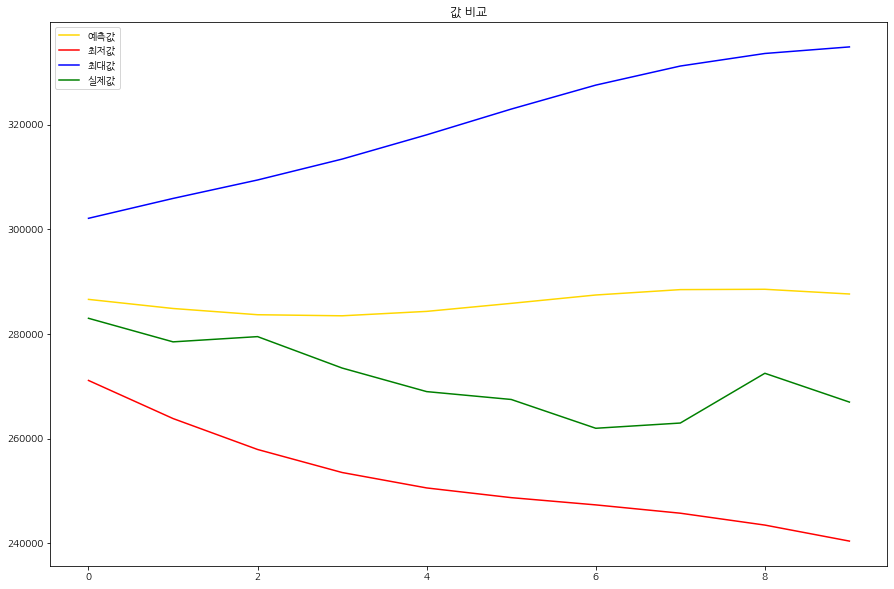

In [60]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))
print(rmse_arima)

16498.161251586265


# Prophet

## 데이터 로드

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# 주식가격 로딩
import FinanceDataReader as fdr
from pykrx import stock

# 삼성전자 2018년 이후
end_date = datetime.datetime.now().strftime("%Y%m%d")
cel_df = money_sur('068270', start = '20180101', end = end_date)

cel_df

,Date,Open,High,Low,Close,Volume,Change,BPS,PER,PBR,EPS,DIV,DPS
0,2018-01-02,206047,209825,204757,208167,1176443,0.021709,16457,150.10,13.730000,1505,0.0,0
1,2018-01-03,210931,227794,209272,227334,2411162,0.092075,16457,163.92,14.990000,1505,0.0,0
2,2018-01-04,230007,240696,226044,230376,3265527,0.013381,16457,166.11,15.190000,1505,0.0,0
3,2018-01-05,234890,246041,234061,245949,1920918,0.067598,16457,177.34,16.219999,1505,0.0,0
4,2018-01-08,256637,279399,255440,278754,4298770,0.133381,16457,201.00,18.379999,1505,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,2021-09-10,269500,271000,265500,267500,394088,-0.005576,24262,71.22,11.030000,3756,0.0,0
912,2021-09-13,266500,267000,260500,262000,505510,-0.020561,24262,69.76,10.800000,3756,0.0,0
913,2021-09-14,261500,265000,260500,263000,416684,0.003817,24262,70.02,10.840000,3756,0.0,0
914,2021-09-15,266000,275500,265500,272500,576273,0.036122,24262,72.55,11.230000,3756,0.0,0


## Prophet 모델 실습

- Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측모델로, 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다.
- fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피쳐를 'ds'와 'y'로 변경해야 한다. 
  - sesonality_mode: 연간, 월간, 주간, 일간 등의 트렌드성을 반영하는 것을 의미하는 파라미터
    - Additive는 데이터의 진폭이 일정함을 의미하고, Multiplicative는 데이터의 진폭이 점점 증가하거나 감소하는 것을 뜻함
  - changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터. 수치가 높을수록 모델은 과적합에 가까워진다.

In [63]:
df1 = cel_df[['Date','Close']]
df1

,Date,Close
0,2018-01-02,208167
1,2018-01-03,227334
2,2018-01-04,230376
3,2018-01-05,245949
4,2018-01-08,278754
...,...,...
911,2021-09-10,267500
912,2021-09-13,262000
913,2021-09-14,263000
914,2021-09-15,272500


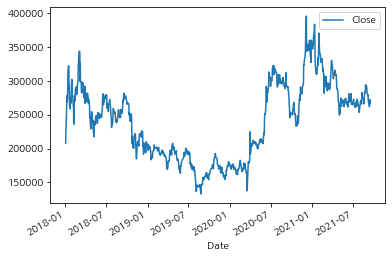

In [64]:
df1.plot('Date','Close')

In [65]:
df1.columns = ['ds', 'y']

In [66]:
# train, test
train = df1[:-10]
test = df1[-10:]

In [67]:
from fbprophet import Prophet

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.6)

prophet.fit(train)

In [68]:
# 10일단위로 예측값을 가져옴
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
906,2021-09-03,301952.112857,287057.572802,316993.732228
907,2021-09-04,258225.874281,244013.469831,272733.834333
908,2021-09-05,260236.320430,245420.078811,274681.343922
909,2021-09-06,307907.715879,293640.645612,321641.421004
910,2021-09-07,309266.671072,294959.322619,322936.207030
911,2021-09-08,310039.160912,296778.061248,325622.345384
912,2021-09-09,312306.925567,297322.571691,327802.426593
913,2021-09-10,315231.077114,300753.462345,330354.074997
914,2021-09-11,271261.144441,255931.884270,285753.082180
915,2021-09-12,272896.897291,257103.805903,286988.843555


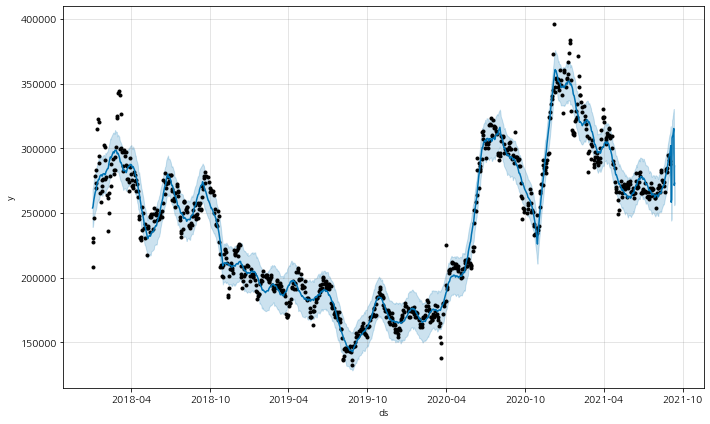

In [69]:
fig1 = prophet.plot(forecast_data)

그래프는 fbprophet에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해놓은 경우에만 이 시각화가 가능

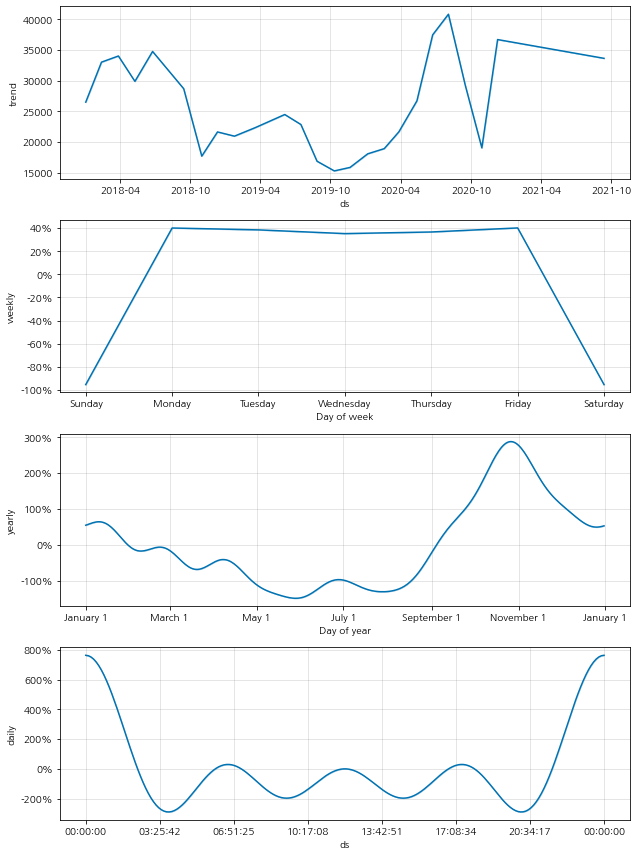

In [70]:
fig2 = prophet.plot_components(forecast_data)

## 결과

In [71]:
# test
test.y.values

array([283000, 278500, 279500, 273500, 269000, 267500, 262000, 263000,
       272500, 267000])

Text(0.5, 1.0, '값 비교')

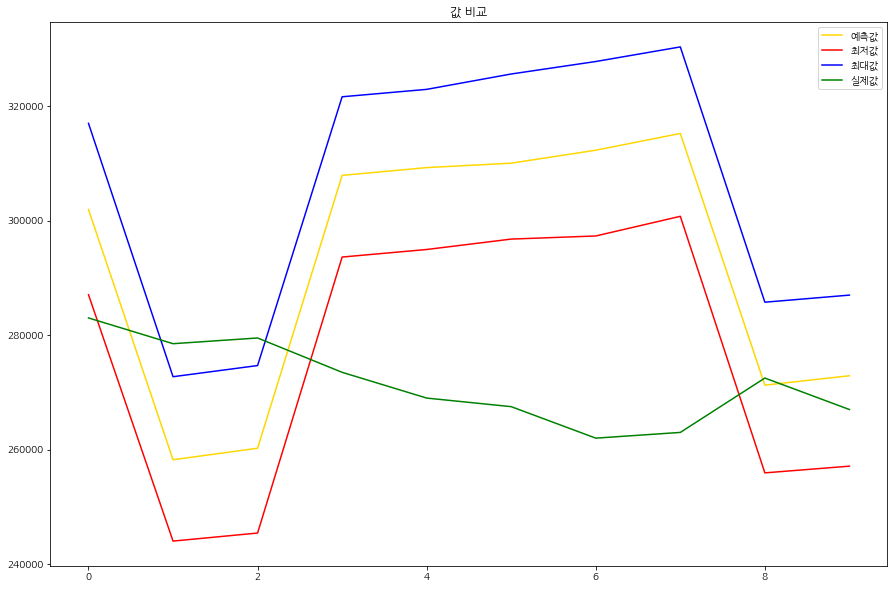

In [72]:
plt.figure(figsize=(15, 10))

# 마지막 10일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-10:]

# 실제 10일의 데이터 
test_y = test.y.values

# 마지막 10일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-10:]
# 마지막 10일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-10:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['예측값', '최저값','최대값','실제값'])
plt.title("값 비교")

In [73]:
pred_fbprophet_y

array([301952.11285677, 258225.87428099, 260236.32042983, 307907.71587946,
       309266.67107153, 310039.16091153, 312306.92556664, 315231.07711428,
       271261.14444099, 272896.89729104])

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

prophet_arima = sqrt(mean_squared_error(pred_fbprophet_y, test_y))
print(prophet_arima)

33243.59842964174


## 모델 비교

In [75]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})
df

,ARIMA 예측값,FBprophet 예측값,실제값
0,286611.331091,301952.112857,283000
1,284871.699609,258225.874281,278500
2,283680.478522,260236.320430,279500
3,283476.476332,307907.715879,273500
4,284319.560610,309266.671072,269000
5,285850.929744,310039.160912,267500
6,287447.616642,312306.925567,262000
7,288475.296883,315231.077114,263000
8,288539.974477,271261.144441,272500
9,287638.512858,272896.897291,267000


Text(0.5, 1.0, '값 비교')

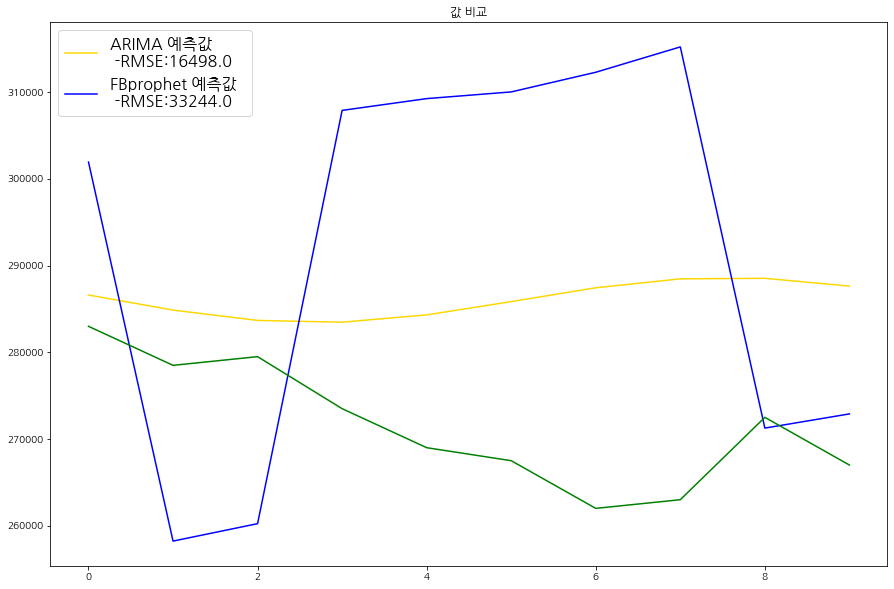

In [76]:
plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'blue')


# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("값 비교")